In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import Model
import Training
import Simulation

## Model Comparison

### Effect of Window Size

In [2]:
# Fixed Parameters for Comparison
layer_struct = (32, 64, 64, 64, 32)
states_initial = np.array([
    [np.pi/5, 2.5],
    [np.pi/6, -0.5],
    [-np.pi/1.5, 0],
    [-np.pi/2, -1.5],
])
length = 1.0
batch_size = 256
time_max = 20
dt = 0.01
epochs = 30
activation_function = nn.Softmax(dim=1)

In [3]:
# Creating True Data

# Choose a new initial state for fair evaluation
test_initial_state = np.array([np.pi/2, 2])  # Different from training init

theta_arr, theta_dot_arr, time_arr = Simulation.Solver(
    Simulation.Euler_Lagrange_Equation,
    test_initial_state[0], test_initial_state[1],
    time_max, dt, length
)

test_states = np.stack([theta_arr, theta_dot_arr], axis=-1)  # [T, 2]

In [4]:
# Testing Model

device = torch.device("cuda" if torch.cuda.is_available() else
                      "mps" if torch.backends.mps.is_available() else "cpu")


theta = torch.tensor([[test_states[0, 0]]], device=device, dtype=torch.float32)      # shape [1, 1]
theta_dot = torch.tensor([[test_states[0, 1]]], device=device, dtype=torch.float32)  # shape [1, 1]

In [5]:
window_1_pred = []
window_3_pred = []
window_5_pred = []
window_10_pred = []

In [6]:
# Training Models based on different Window Sizes
LNN_window_1 = Model.LNN(hidden_layers=layer_struct,activation_fn=activation_function)
Training.LNN_Workout(
    lnn_model=LNN_window_1, states_initial=states_initial, length = length, t_max=time_max, dt=dt, window_size = 1, batch_size=batch_size, epochs=epochs, resume = False)

Starting Training. 
 7.. 8.. 9.. 10.. A Machine here
Epoch 1/30 - Loss: 0.00591429
Epoch 6/30 - Loss: 0.00384649
Epoch 11/30 - Loss: 0.00383647
Epoch 16/30 - Loss: 0.00382834
Epoch 21/30 - Loss: 0.00382795
Epoch 26/30 - Loss: 0.00382060
Saved final checkpoint to saves/save_latest.pth (loss=0.00382405)


In [7]:
LNN_window_1 = LNN_window_1.to(device)
LNN_window_1.eval()
for i in range(len(test_states) - 1):
    theta, theta_dot = Simulation.rk4_step_LNN(Model.LNN_Euler_Lagrange, LNN_window_1, theta, theta_dot, dt)
    theta = theta.detach()
    theta_dot = theta_dot.detach()
    window_1_pred.append([float(theta.item()), float(theta_dot.item())])

In [8]:

LNN_window_3 = Model.LNN(hidden_layers=layer_struct,activation_fn=activation_function)
Training.LNN_Workout(
    lnn_model=LNN_window_3, states_initial=states_initial, length = length, t_max=time_max, dt=dt, window_size = 3, batch_size=batch_size, epochs=epochs, resume = False)

Starting Training. 
 7.. 8.. 9.. 10.. A Machine here
Epoch 1/30 - Loss: 0.02933961
Epoch 6/30 - Loss: 0.01148812
Epoch 11/30 - Loss: 0.01129783
Epoch 16/30 - Loss: 0.01130895
Epoch 21/30 - Loss: 0.01118729
Epoch 26/30 - Loss: 0.01118700
Saved final checkpoint to saves/save_latest.pth (loss=0.01123507)


In [9]:
LNN_window_3 = LNN_window_3.to(device)
LNN_window_3.eval()
for i in range(len(test_states) - 1):
    theta, theta_dot = Simulation.rk4_step_LNN(Model.LNN_Euler_Lagrange, LNN_window_3, theta, theta_dot, dt)
    theta = theta.detach()
    theta_dot = theta_dot.detach()
    window_3_pred.append([float(theta.item()), float(theta_dot.item())])

In [10]:

LNN_window_5 = Model.LNN(hidden_layers=layer_struct,activation_fn=activation_function)
Training.LNN_Workout(
    lnn_model=LNN_window_5, states_initial=states_initial, length = length, t_max=time_max, dt=dt, window_size = 5, batch_size=batch_size, epochs=epochs, resume = False)

Starting Training. 
 7.. 8.. 9.. 10.. A Machine here
Epoch 1/30 - Loss: 0.06850536
Epoch 6/30 - Loss: 0.01844760
Epoch 11/30 - Loss: 0.01832271
Epoch 16/30 - Loss: 0.01824067
Epoch 21/30 - Loss: 0.01815990
Epoch 26/30 - Loss: 0.01820760
Saved final checkpoint to saves/save_latest.pth (loss=0.01812696)


In [11]:
LNN_window_5 = LNN_window_5.to(device)
LNN_window_5.eval()
for i in range(len(test_states) - 1):
    theta, theta_dot = Simulation.rk4_step_LNN(Model.LNN_Euler_Lagrange, LNN_window_5, theta, theta_dot, dt)
    theta = theta.detach()
    theta_dot = theta_dot.detach()
    window_5_pred.append([float(theta.item()), float(theta_dot.item())])

In [12]:

LNN_window_10 = Model.LNN(hidden_layers=layer_struct,activation_fn=activation_function)
Training.LNN_Workout(
    lnn_model=LNN_window_10, states_initial=states_initial, length = length, t_max=time_max, dt=dt, window_size = 10, batch_size=batch_size, epochs=epochs, resume = False)

Starting Training. 
 7.. 8.. 9.. 10.. A Machine here
Epoch 1/30 - Loss: 0.23128831
Epoch 6/30 - Loss: 0.03556036
Epoch 11/30 - Loss: 0.03526797
Epoch 16/30 - Loss: 0.03425237
Epoch 21/30 - Loss: 0.03406204
Epoch 26/30 - Loss: 0.03395065
Saved final checkpoint to saves/save_latest.pth (loss=0.03407348)


In [13]:
LNN_window_10 = LNN_window_10.to(device)
LNN_window_10.eval()
for i in range(len(test_states) - 1):
    theta, theta_dot = Simulation.rk4_step_LNN(Model.LNN_Euler_Lagrange, LNN_window_10, theta, theta_dot, dt)
    theta = theta.detach()
    theta_dot = theta_dot.detach()
    window_10_pred.append([float(theta.item()), float(theta_dot.item())])

In [14]:

window_1_states = np.array(window_1_pred)
window_3_states = np.array(window_3_pred)
window_5_states = np.array(window_5_pred)
window_10_states = np.array(window_10_pred)
print(window_1_states.shape, window_3_states.shape, window_5_states.shape, window_10_states.shape)

(1999, 2) (1999, 2) (1999, 2) (1999, 2)


In [15]:
true_states = test_states[1:len(window_1_states)+1]  # Align shapes

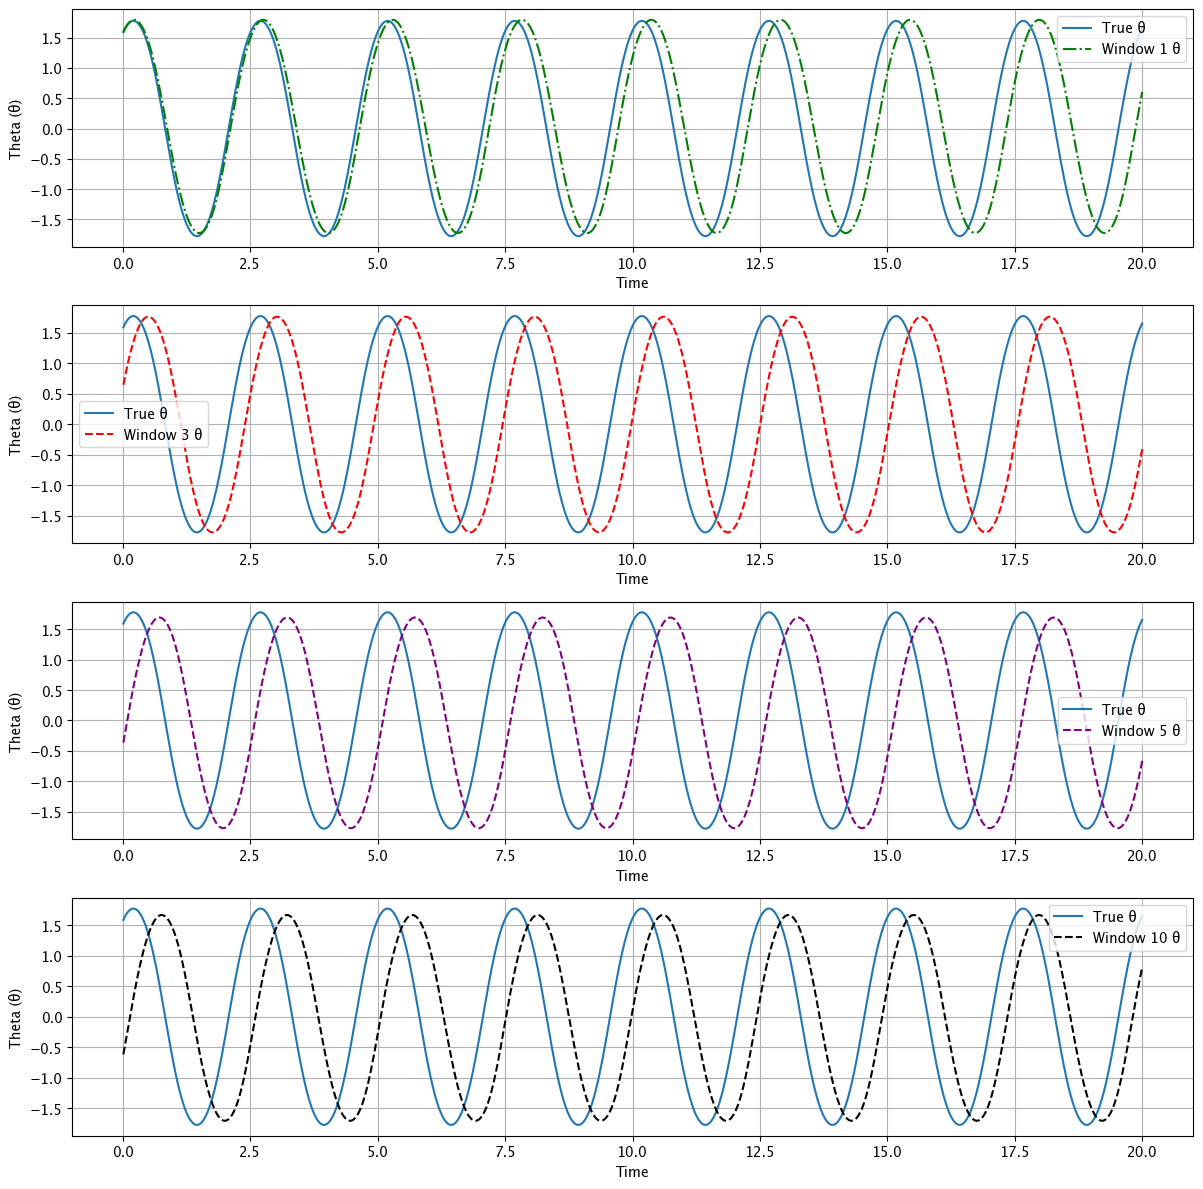

In [17]:
plt.figure(figsize=(12, 12))

plt.subplot(4, 1, 1)
plt.plot(time_arr[1:len(true_states)+1], true_states[:, 0], label='True θ')
plt.plot(time_arr[1:len(true_states)+1], window_1_states[:, 0], '-.',c = "green", label='Window 1')
plt.xlabel("Time")
plt.ylabel("Theta (θ)")
plt.grid(True)
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(time_arr[1:len(true_states)+1], true_states[:, 0], label='True θ')
plt.plot(time_arr[1:len(true_states)+1], window_3_states[:, 0], '--',c = "red",  label='Window 3')
plt.xlabel("Time")
plt.ylabel("Theta (θ)")
plt.grid(True)
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(time_arr[1:len(true_states)+1], true_states[:, 0], label='True θ')
plt.plot(time_arr[1:len(true_states)+1], window_5_states[:, 0], '--',c = "purple",  label='Window 5')
plt.xlabel("Time")
plt.ylabel("Theta (θ)")
plt.grid(True)
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(time_arr[1:len(true_states)+1], true_states[:, 0], label='True θ')
plt.plot(time_arr[1:len(true_states)+1], window_10_states[:, 0], '--',c = "black", label='Window 10')
plt.xlabel("Time")
plt.ylabel("Theta (θ)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()